<a href="https://colab.research.google.com/github/SomyaH99/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project Title : Cardiovascular Risk Prediction**

#**Problem Description**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patient's information. It includes over 4,000 records and 15 attributes.


#**Data Description**

**Variables:**
 

*  Each attribute is a potential risk factor. There are both demographic,behavioral, and medical risk factors.




**Demographic:**


*   **Sex:** male or female("M" or "F")
*   **Age:** Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)



**Behavioral:**

*   **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")
*   **Cigs Per Day:** the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)



**Medical( history)**

*   **BP Meds:** whether or not the patient was on blood pressure medication (Nominal)
*   **Prevalent Stroke:** whether or not the patient had previously had a stroke (Nominal)
*   **Prevalent Hyp:** whether or not the patient was hypertensive (Nominal)
*   **Diabetes:** whether or not the patient had diabetes (Nominal)



**Medical(current):**

*   **Tot Chol:** total cholesterol level (Continuous)
*   **Sys BP:** systolic blood pressure (Continuous)
*   **Dia BP:** diastolic blood pressure (Continuous)
*   **BMI:** Body Mass Index (Continuous)
*   **Heart Rate:** heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
*   **Glucose:** glucose level (Continuous)




**Predict variable (desired target):**

*  10-year risk of **coronary heart disease CHD**(binary: “1”, means “Yes”, “0” means “No”) - DV 



#**Importing Libraries**

In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from imblearn.over_sampling import SMOTE 
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
sns.set_style('darkgrid')
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [3]:
#Loading the Data
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Classification Capstone project/Cardiovascular Risk Prediction/data_cardiovascular_risk.csv')

In [4]:
# First 5 rows
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
# columns in our dataset
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [6]:
# Description of all columns in the dataset.
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3390.0,NaN,NaN,NaN,1694.5,978.753033,0.0,847.25,1694.5,2541.75,3389.0
age,3390.0,NaN,NaN,NaN,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
education,3303.0,NaN,NaN,NaN,1.970936,1.019081,1.0,1.0,2.0,3.0,4.0
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368.0,NaN,NaN,NaN,9.069477,11.879078,0.0,0.0,0.0,20.0,70.0
BPMeds,3346.0,NaN,NaN,NaN,0.029886,0.170299,0.0,0.0,0.0,0.0,1.0
prevalentStroke,3390.0,NaN,NaN,NaN,0.00649,0.080309,0.0,0.0,0.0,0.0,1.0
prevalentHyp,3390.0,NaN,NaN,NaN,0.315339,0.464719,0.0,0.0,0.0,1.0,1.0
diabetes,3390.0,NaN,NaN,NaN,0.025664,0.158153,0.0,0.0,0.0,0.0,1.0


In [7]:
# data types and null values in features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

* In the Dataset we have total of 3390 rows and 17 columns.

We havee missing values in:
 

*   education
*   cigsperday
*   BPMeds
*   totChol
*   BMI
*   Heart Rate
*   glucose



In [8]:
#Sanity check
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False).head()

glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
dtype: float64

Except glucose all other features in the dataset have less than 5% null values.

Now the main issue with these null values is that they can't be estimated from other data entries. The dataset we are working on is from a medical domain, that said, the entries in this data are person specific and the values vary among different individuals. Its a rare chance the two individuals share same health stats, hence the most logical option that we have to deal with such values is removing the rows with any null value.

In [9]:
# Making a copy of our dataset 
new_df = df.copy()

In [10]:
# dropping the missing value.
df1 = new_df.dropna(how = "any")

In [11]:
# Checking if there's still any null values left.
df1.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [12]:
# Checking for the duplicate values
len(df1[df1.duplicated()])


0

In [13]:
#Dropping redundant variable "id"
df1.drop("id",axis=1,inplace=True)

In [14]:
df1.drop("education",axis=1,inplace=True)

Unique Values

In [15]:
#columns list
col_lst = ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

In [16]:
#unique element function
def unique_element(columns):
  for col_name in columns:
    print(f'{col_name} : {df1[col_name].unique()}\n')    #getting unique element of each columns list

unique_element(col_lst)                                                  #function calling

sex : ['M' 'F']

is_smoking : ['NO' 'YES']

BPMeds : [0. 1.]

prevalentStroke : [0 1]

prevalentHyp : [1 0]

diabetes : [0 1]



TenYearCHD

In [17]:
# Checking the total people who have a risk of CHD(Coronary Heart Disease).
df1["TenYearCHD"].value_counts()

0    2483
1     444
Name: TenYearCHD, dtype: int64

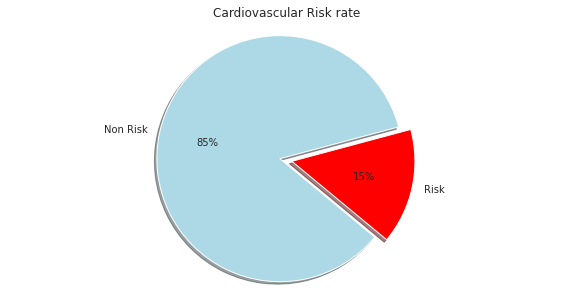

In [18]:
labels = 'Non Risk',"Risk"
my_colors = ['lightblue','red']
my_explode = (0,0.1)
plt.figure(figsize=(10,5))
plt.pie(df1['TenYearCHD'].value_counts(), labels=labels ,autopct='%1.0f%%', startangle =15, shadow =True, colors = my_colors, explode=my_explode )
plt.title("Cardiovascular Risk rate")
plt.axis('equal')
plt.show()

Here we can see that there is a huge class imbalance.

It is clear the percentage/count of people with normal results are pretty high and this creates a problem of class imbalance. It could create problems for model to perform better in such case because it'll be overfitted with entries of normal patients and hence it becomes hard to predict for a person with a disorder because the model would be biased for the other output.

So we have to convert this data into a balance class, we can achieve so by using different sampling techniques, during train/test split.

#**Gender**

In [19]:
# Counting the number of males and females.
df1["sex"].value_counts()

F    1620
M    1307
Name: sex, dtype: int64

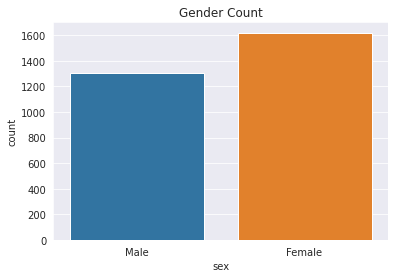

In [20]:
# Plotting the bar graph with number of males and females.
g = sns.countplot(df1['sex'])
g.set_xticklabels(['Male','Female'])
g.set_title('Gender Count')

# Show the graph.
plt.show()

We can see that number of female entries are more than males. Since the data is a bit biased towards females, the model would be much more optimal to predict for a female patient.

In [21]:
# Converting "sex" into binary column(0 for females and 1 for males).
df1['sex'] = df1['sex'].map({'M':1 ,'F': 0})

# Is_Smoking

In [22]:
# Counting the number of smokers.
df1["is_smoking"].value_counts()

NO     1480
YES    1447
Name: is_smoking, dtype: int64

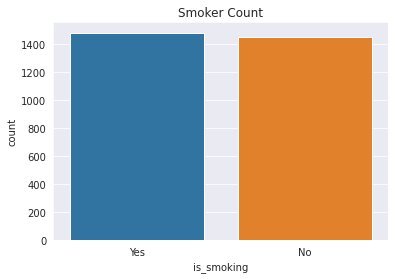

In [23]:
# Plotting number of people smoking vs not smoking.
g = sns.countplot(df1['is_smoking'])
g.set_xticklabels(['Yes','No'])
g.set_title('Smoker Count')

# Show the Graph.
plt.show()

There are nearly same amount of entries with people who smoke and those who does'nt, this is great since it won't cause any class imbalance.

In [24]:
# Number of males who smokes cigarette.
male_smokers = df1.loc[(df1['is_smoking']=='YES') & (df1['sex']==1)]

In [25]:
#Male smokers
male_smokers.shape[0]

809

In [26]:
# Number of females who smokes cigarette.
female_smokers = df1.loc[(df1['is_smoking']=='YES') & (df1['sex']==0)]

In [27]:
# Female smokers.
female_smokers.shape[0]

638

Its clear that number of males who smokes are significantly higher than the female smokers, even though the entries for female patients were more. This shows smoking is more common in males and its a major cause of CHDs for male patients.

In [28]:
# Converting "is_smoking" into binary(1 for people who smokes and 0 for those who does'nt).
df1['is_smoking'] = df1['is_smoking'].map({'YES':1 ,'NO': 0})

#Diabetes

In [29]:
#Checking the value counts for diabetes
df1["diabetes"].value_counts()

0    2848
1      79
Name: diabetes, dtype: int64

We can see that there's a huge gap between the people who have diabetes and to those who does'nt, infact there are only 79 people who does have diabetes. This again depicts the data is biased for non-diabetic patients.

# Distributions

In [30]:
# Differentiating the numerical and categorical features
categorical_features = [i for i in df1.columns if df1[i].nunique()<=4]
numeric_features = [i for i in df1.columns if i not in categorical_features]

In [31]:
print("Following are the categorical features in this dataset:")
print(categorical_features)
print("Following are the numeric features in this dataset:")
print(numeric_features)

Following are the categorical features in this dataset:
['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
Following are the numeric features in this dataset:
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


Categorical Features are mostly binary type in our case, hence the values majorly are either 0 and 1 (some exceptions excluded). As for the numeric features, all have a different set of range and continuity of values.

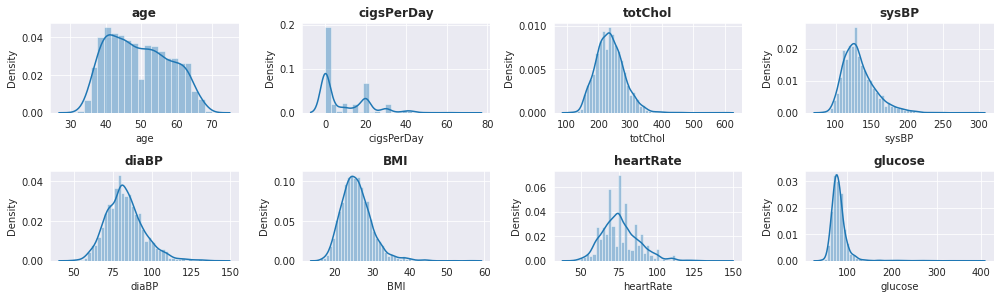

In [32]:
# Visualizing the distributions for numeric features.
# Defining figure.
plt.figure(figsize=(14,10))

# plotting subplots for all numeric features.
for i, column in enumerate(numeric_features):
  plt.subplot(5, 4, i+1)
  sns.distplot(df1[column])
  plt.title(f'{column}', weight='bold')
  plt.tight_layout()

We can observe that most of the distributions are right skewed for numeric features. **totChol **(total cholesterol) and **BMI** have roughly similar distributions, which depicts a linear dependency.** Glucose** have a highly right skewed distribution, this might lead to some biasness. It shows Glucose has a lotof outliers. Though it is usually a good practice to deal with such outliers, however in this case we can't do much about it. The data is taken through medical survey and the values are patient's health stats, hence those values are absolute and we cant manipulate them by any means. We could have used techniques like Square root transformation, Log tranformation,etc., to convert the column for getting a better distribution, but since we can't manipulate a medical statistics of a person, it is suggestive to go with the actual values.

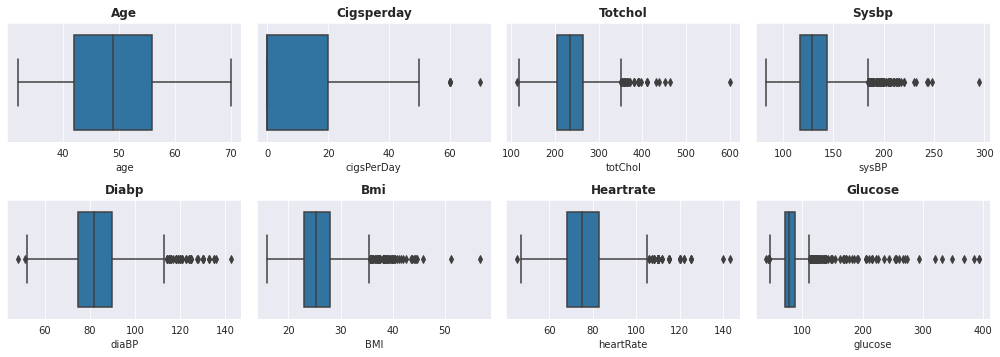

In [33]:
# Box plot distributions for numeric features.
# Define a figure.
plt.figure(figsize=(14,12))

# plotting subplots for every numeric feature.
for i,column in enumerate(numeric_features):
  plt.subplot(5, 4, i+1)
  sns.boxplot(df1[column])
  plt.title(f'{column.title()}', weight='bold')
  plt.tight_layout()

We can see a lot of outliers in columns like, Totchol, SysBP, DiaBP, BMI, Glucose, etc. As stated before we can't manipulate data in such way that we change the original patient stats, neither we can entirely drop those entries with outliers. This will lead to huge amount of data loss, We would lose meaningful data in order to achieve this. The best solution to this could only be, to drop the rows with such outliers with minimal data loss.

Dropping rows with borderline outliers, We'll try to be considerate and only drop values that do not make any sense or unlikely to occur.

In [34]:
# Dropping rows with Cigarette per day greater than 50.
df1 = df1[df1["cigsPerDay"] <= 50]

In [35]:
# Dropping rows with DiaBp greater than 140.
df1 = df1[df1['diaBP'] <= 140]

In [36]:
# Dropping rows with SysBP greater than 250.
df1 = df1[df1['sysBP'] <= 250]

In [37]:
# Dropping rows with BMI greater than 50.
df1 = df1[df1['BMI'] <= 50]


In [38]:
# Dropping rows with heart rate greater than 130.
df1 = df1[df1["heartRate"] <= 130]

In [39]:
# Dropping rows with glucose greater than 300.
df1 = df1[df1["glucose"] <= 300]

In [40]:
# Dropping rows with total cholesterol greater than 500.
df1 = df1[df1["totChol"] <= 500]

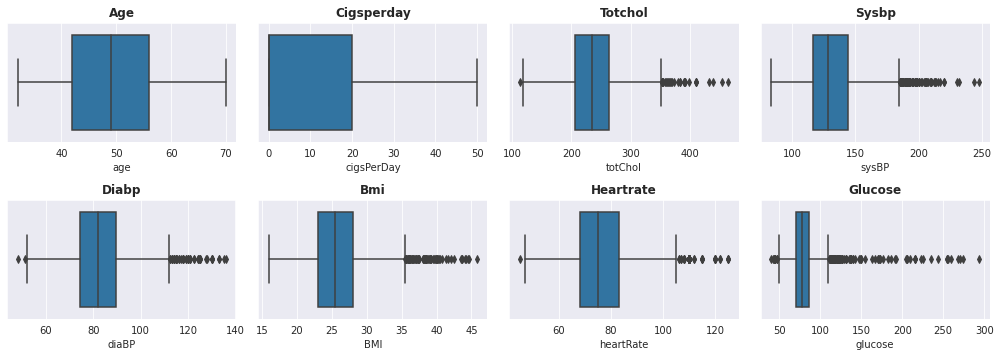

In [41]:
# Box plot distributions for numeric features.
# Define a figure.
plt.figure(figsize=(14,12))

# plotting subplots for every numeric feature.
for i,column in enumerate(numeric_features):
  plt.subplot(5, 4, i+1)
  sns.boxplot(df1[column])
  plt.title(f'{column.title()}', weight='bold')
  plt.tight_layout()

In [42]:
# Generalized dataset.
df1

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61,0,0,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0
3385,60,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


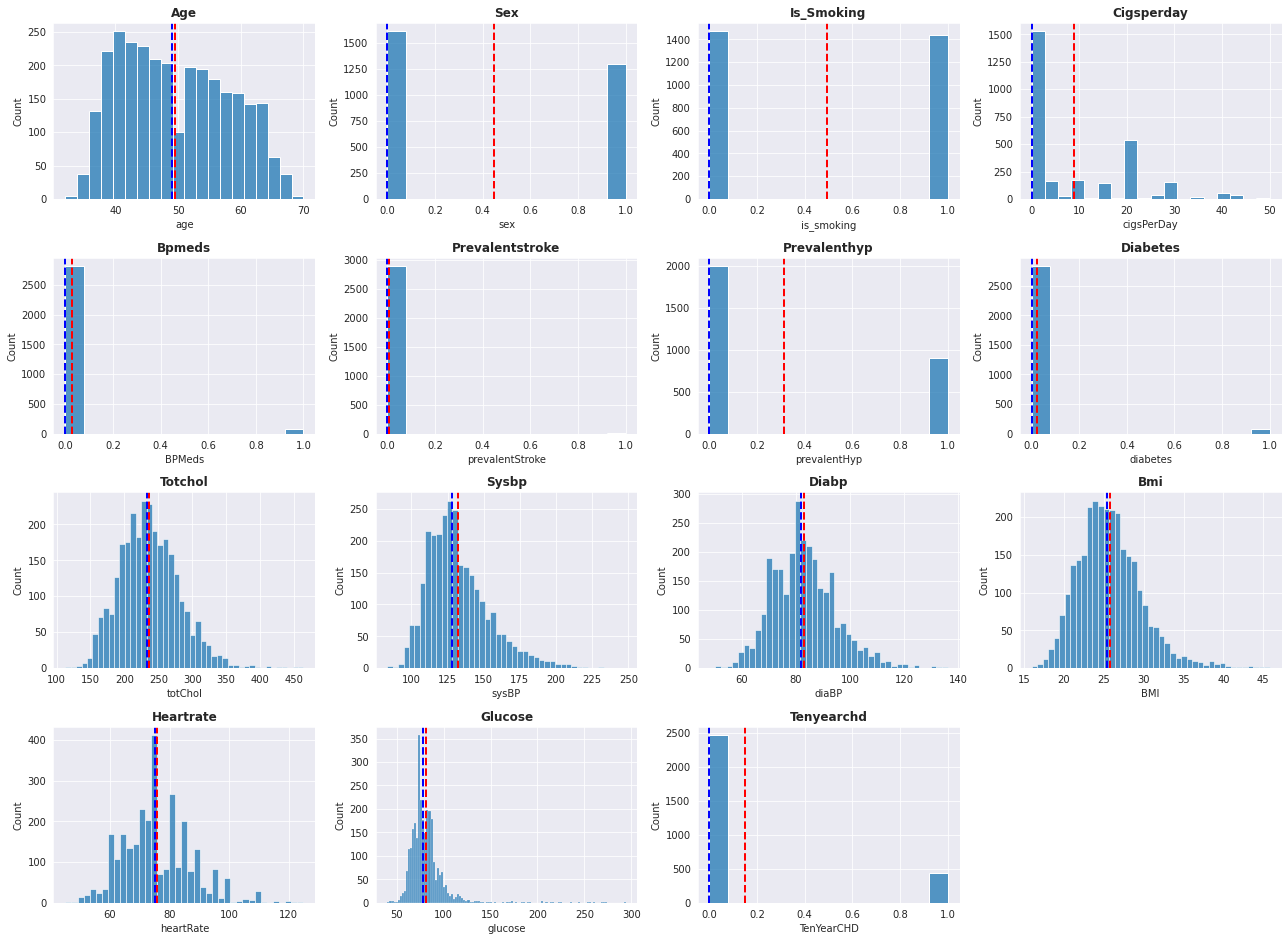

In [43]:
# Visualizing the mean and median lines for various attributes, 
# along with their distribution graphs.
plt.figure(figsize=(18,16))

# Making subplots for all the features to represent their mean, median and distributions
for i, column in enumerate(df1.columns):
  feature = df1[column]
  ax=plt.subplot(5, 4, i+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

BP Meds

In [44]:
df1.BPMeds.unique()

array([0., 1.])

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

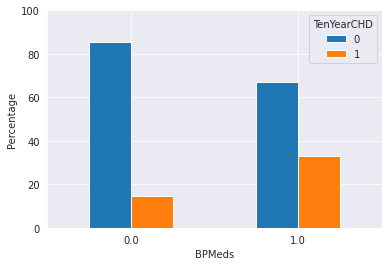

In [45]:
freq_df = df1.groupby('TenYearCHD')['BPMeds'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)

People who take Blood pressure meds have a higher chance of having CHD

Prevalent Stroke

In [46]:
df1.prevalentStroke.unique()

array([0, 1])

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

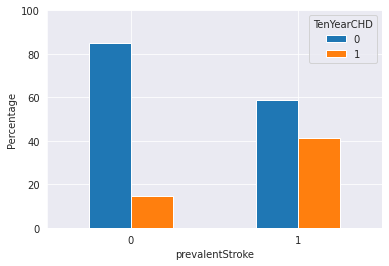

In [47]:
freq_df = df1.groupby('TenYearCHD')['prevalentStroke'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)

Higher percentage of patients with prevalent stroke symptoms have a 10-year risk of CHD.

Prevalent Hypertension

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

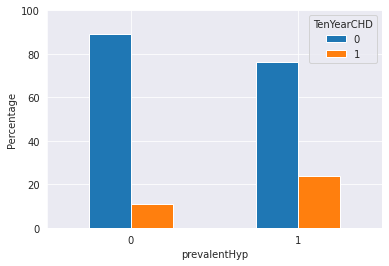

In [48]:
freq_df = df1.groupby('TenYearCHD')['prevalentHyp'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)

Hypertensive patients are at higher risk of CHD

Diabetes

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

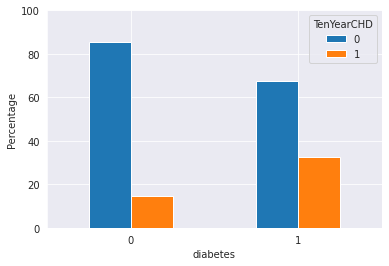

In [49]:
freq_df = df1.groupby('TenYearCHD')['diabetes'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar")
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)

Diabetic patients tend to have a higher 10-year risk of CHD

Bivariate Analysis

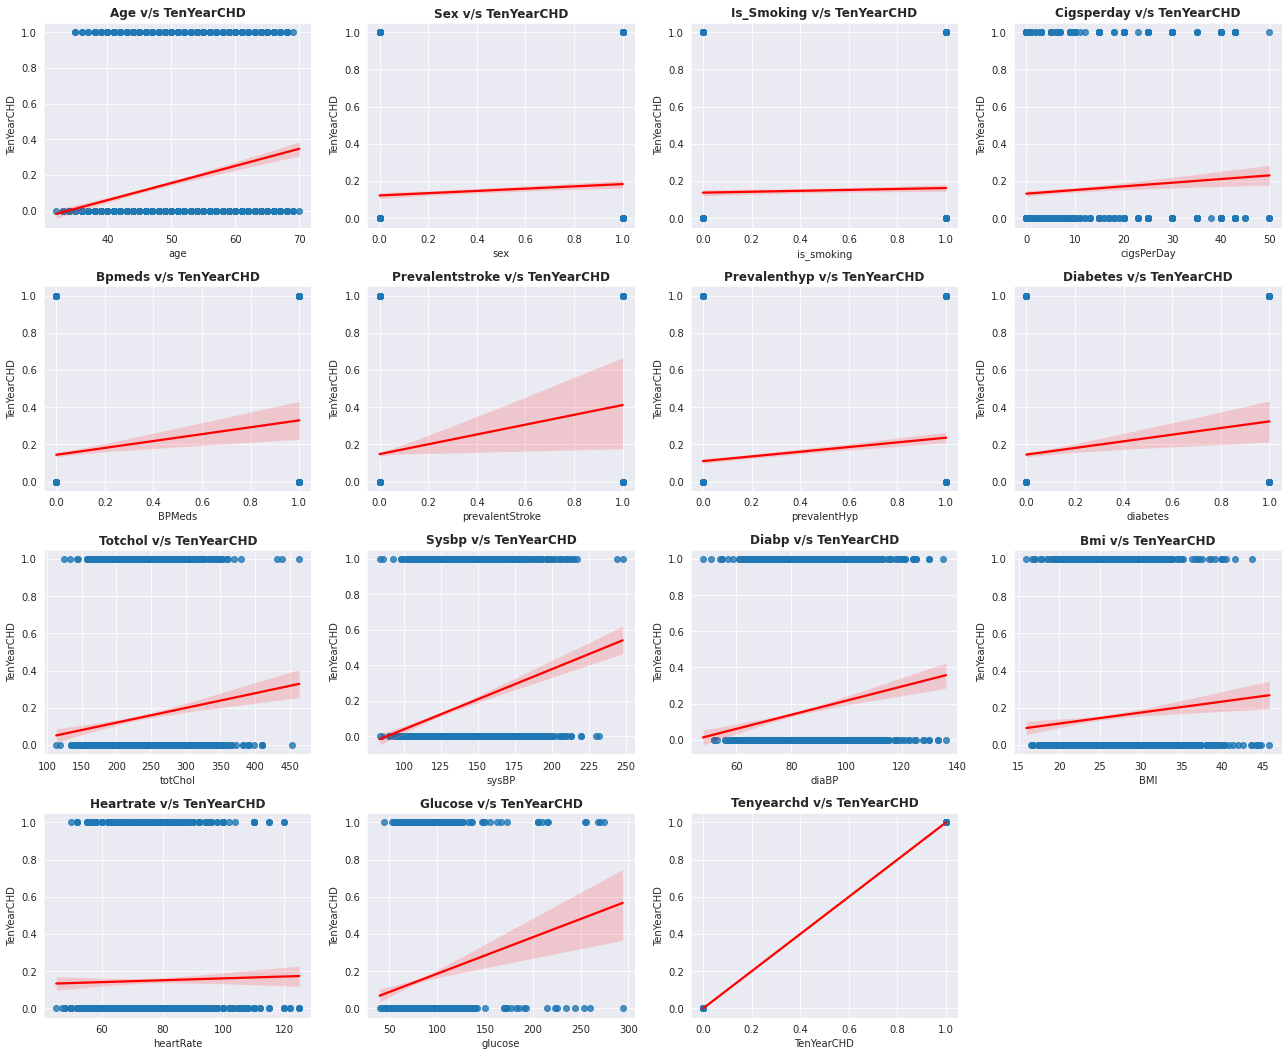

In [50]:
# Checking Linearity using Bivariate analysis.
# list of independent variables.
independent_variables = [i for i in df1.columns if i not in ['TenYearCHD']]

# defining figure.
plt.figure(figsize=(18,18))

# making subplots for all independent variables vs TenYearCHD(dependent variable).
for n, column in enumerate(df1.columns ):
  plt.subplot(5, 4, n+1)
  sns.regplot(x = df1[column], y =df1['TenYearCHD'],line_kws={"color": "red"})
  plt.title(f'{column.title()} v/s TenYearCHD',weight='bold')
  plt.tight_layout()

Chances of getting CHD according to age

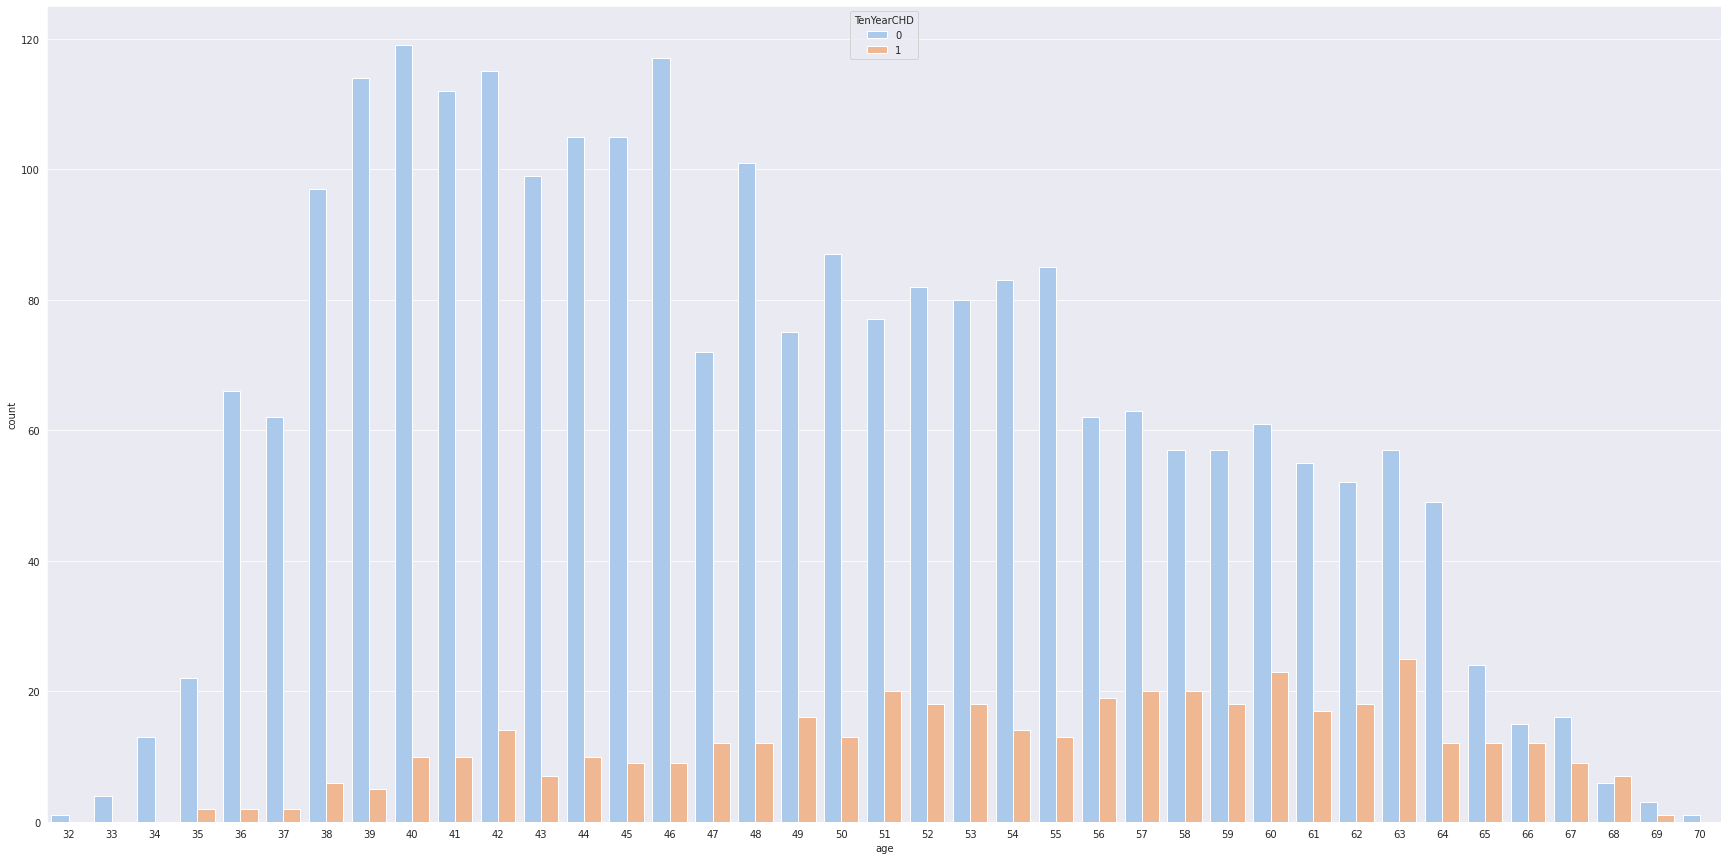

In [51]:
plt.figure(figsize=(30,15))
sns.countplot(data=df1,x='age',hue='TenYearCHD',palette='pastel')
plt.show()

Conclusion:

* Chances of getting CHD are mostly among the age group 42-63.

* While age group below 35 has lowest chances of getting CHD.

Relation between sysBP and risk of CHD

In [52]:
df1.columns

Index(['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

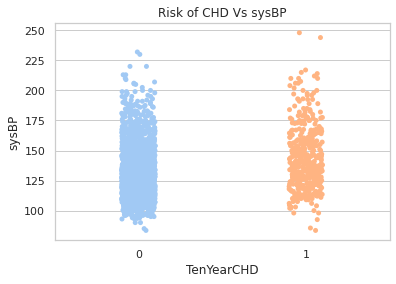

In [53]:
sns.set(style='whitegrid')
ax=sns.stripplot(x='TenYearCHD',y='sysBP',data= df1,palette='pastel')
plt.title('Risk of CHD Vs sysBP')
plt.show()

Relation between diaBP and risk of TenYearCHD

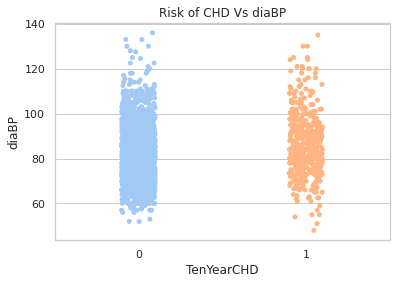

In [54]:
sns.set(style='whitegrid')
ax=sns.stripplot(x='TenYearCHD',y='diaBP',data= df1 ,palette='pastel')
plt.title('Risk of CHD Vs diaBP')
plt.show()

Countplot of people who is smoking or not according to the gender.

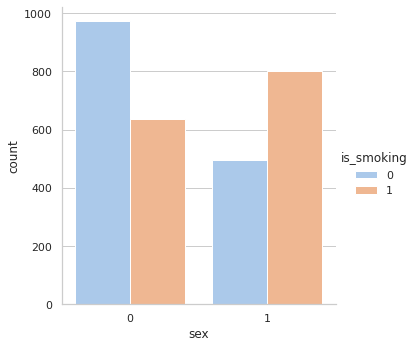

In [55]:
sns.catplot(data= df1,kind='count',x='sex',hue='is_smoking',palette='pastel')
plt.show()

Conclusion: Males smokes more compared to female.

No of people affecting with CHD on the basis of their sex

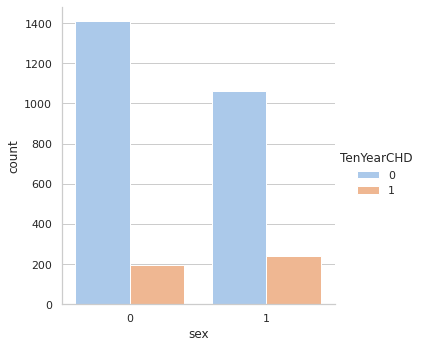

In [56]:
sns.catplot(data= df1 ,kind='count',x='sex',hue='TenYearCHD',palette='pastel')
plt.show()

Conclusion:females and males both have equal chances of getting CHD.

Removing Multicolinearity

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
# Defining a function to calculate Variance Inflation factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

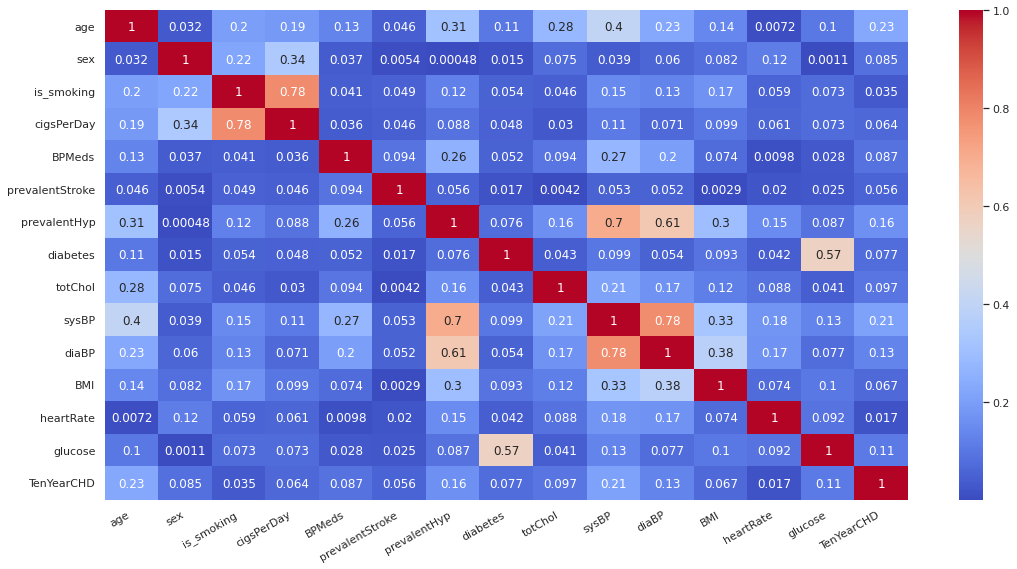

In [59]:
# Checking corelations
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df1.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

**DiaBp and SysBP**

From the above Heatmap, We can see both of these columns are heavily correleted, there's some relationship we can establish with these two features further.

Also Elevation of systolic blood pressure predicts the risk of cardiovascular disease better than increases in diastolic blood pressure. Although associated with more variability in measurement, systolic blood pressure is easier to determine and allows more appropriate risk stratification than diastolic blood pressure.

We can combine these two features using the following formula:

**MAP = (Systolic Blood Pressure + 2 x Diastolic Blood Pressure) / 3**

Here, MAP signifies Mean Arterial Pressure


In [60]:
# Calculating MAP using 'SysBP' and 'DiaBP'.
df1["MAP"] = (df1["sysBP"] + 2 * df1["diaBP"])/3

In [61]:
# Dropping the SysBP and DiaBp attributes, since they're both included in MAP.
df1.drop(columns = ["sysBP", "diaBP"], inplace = True)

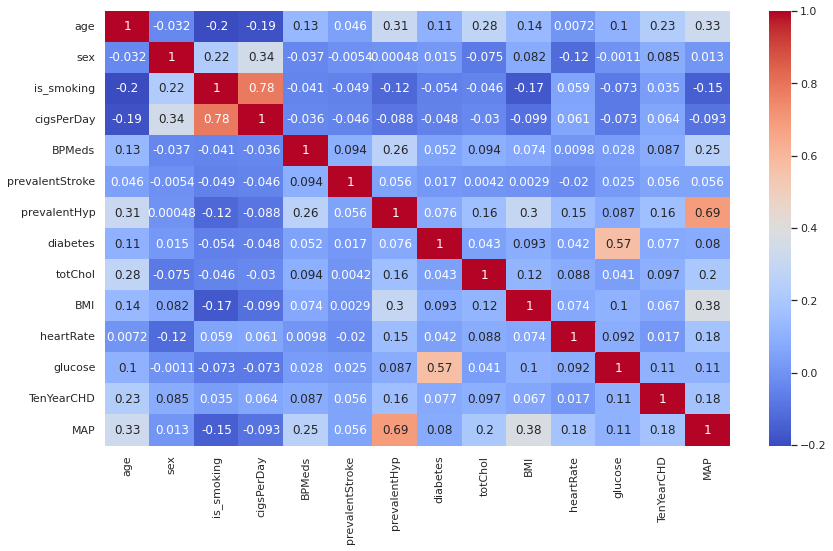

In [62]:
# Defining a Seaborn correlation map(Heatmap).
correlmap = df1.corr()

# display the heatmap.
f, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(correlmap, annot=True, ax = ax,cmap='coolwarm')

In [63]:
# Checking VIF for each variable
independent_variables = [i for i in df1.columns if i not in ['TenYearCHD']]
calc_vif(df1[independent_variables])

,variables,VIF
0,MAP,85.836205
1,BMI,45.351663
2,heartRate,39.293617
3,age,38.821710
4,totChol,32.093155
5,glucose,24.982322
6,is_smoking,5.203840
7,cigsPerDay,4.559280
8,prevalentHyp,2.239753
9,sex,2.155782


What is imbalanced data?

Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

Methods to handle imbalanced dataset
* Resampling
* SMOTE (Synthetic Minority Oversampling Technique)
* BalancedBaggingClassifier

We shall use SMOTE  Technique here to balance our imbalanced dataset

In [64]:
# Splitting the data into set of independent variables and a dependent variable.
X = df1.drop('TenYearCHD',axis=1).values
y = df1['TenYearCHD'].values

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, stratify = y)

In [66]:
# Training data alomg with possible number of results for each class.
pd.DataFrame(y_train).value_counts()

0    1976
1     348
dtype: int64

In [67]:
# Testing data alomg with possible number of results for each class.
pd.DataFrame(y_test).value_counts()

0    495
1     87
dtype: int64

In [68]:
# Importing SMOTETomek for handling class imbalancies.
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

In [69]:
# Handling class imbalances using SMOTE. 
X_smote, y_smote = SMOTETomek(random_state=42).fit_resample(X_train, y_train)

In [70]:
# Dataframe to contain Model performance analysis reports.
res_df=pd.DataFrame()

In [71]:
# Creating model object for logistic regression.
clf = LogisticRegression(fit_intercept=True, max_iter=10000)

# fit the model.
clf.fit(X_smote, y_smote)

LogisticRegression(max_iter=10000)

In [72]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_smote)
test_preds = clf.predict_proba(X_test)

In [73]:
# Getting the predicted classes for training and testing set.
train_class_preds = clf.predict(X_smote)
test_class_preds = clf.predict(X_test)

In [74]:
# Getting the accuracy scores for training and testing set.
train_accuracy = accuracy_score(train_class_preds, y_smote)
test_accuracy = accuracy_score(test_class_preds, y_test)

In [75]:
# Display accuracies.
print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.67
The accuracy on test data is  0.6529209621993127


In [76]:
# Confusion Matrix for logistic regression classifier.
confusion_matrix(y_test,test_class_preds)

array([[320, 175],
       [ 27,  60]])

In [77]:
# Predicted values.
y_pred_log_reg = clf.predict(X_test)

In [78]:
# Getting classification report.
dict1 = classification_report(y_test, y_pred_log_reg, output_dict = True)

In [79]:
# Adding results to the evaluation dataframe.
tempodf = pd.DataFrame(dict1).transpose()
tempodf['Model'] = 'Logistic Regression Classifier'

res_df = res_df.append(tempodf[2:-2])

In [80]:
# Display model evaluation dataframe.
res_df

,precision,recall,f1-score,support,Model
accuracy,0.652921,0.652921,0.652921,0.652921,Logistic Regression Classifier


K-Nearest Neighbour (KNN)

In [81]:
# Number of neighbors.
neighbors = np.arange(1,10)

# Setup arrays to store training and testing accuracies.
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Iterate over n-neighbors in order to get the best hyperparemeter value
for i,k in enumerate(neighbors):

    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the KNN model
    knn.fit(X_smote, y_smote)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_smote, y_smote)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

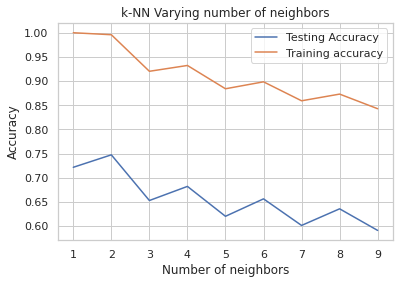

In [82]:
# Generate plot to represent accuracies for training and testing with regards to KNN model
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

We can see that n_neighbors as 2 gives the best test accuracy and hence we'll use this as the best hyperparameter to fit our model.

In [83]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors = 2)

In [84]:
# Fit the model
knn.fit(X_smote, y_smote)

KNeighborsClassifier(n_neighbors=2)

In [85]:
# Getting the predictions using the KNN classifier
y_pred_knn = knn.predict(X_test)

In [86]:
# Confusion matrix for KNN classifier
confusion_matrix(y_test,y_pred_knn)

array([[410,  85],
       [ 62,  25]])

In [87]:
# Getting the prediction probabilities for test set 
y_pred_proba_knn = knn.predict_proba(X_test)[:,1]

In [88]:
from sklearn.metrics import confusion_matrix,roc_curve
from sklearn.metrics import roc_auc_score


In [89]:
# Getting parameters for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_knn)

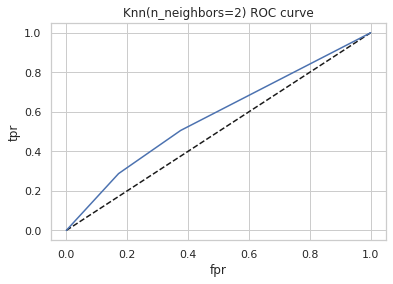

In [90]:
# Plotting the ROC curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=2) ROC curve')
plt.show()

In [91]:
# Area under ROC curve
roc_auc_score(y_test,y_pred_proba_knn)

0.5755601996981308

In [92]:
# Finding precision and recall
recall_score(y_test, y_pred_knn)

0.28735632183908044

In [93]:
# Getting precision score
precision_score(y_test, y_pred_knn)

0.22727272727272727

Hyperparamenter tunning

In [94]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV


In [95]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
# Using Grid search CV for getting the best set of hyperparameters
param_grid = {'n_neighbors':np.arange(1,50)}

In [96]:
# Implementing KNN with gridCV model
knn = KNeighborsClassifier()

# Creting gridCV KNN model with 5 cross validations
knn_cv= GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_smote, y_smote)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [97]:
# Best score for knn model with grid CV
knn_cv.best_score_

0.9

In [98]:
# Best parameter value
knn_cv.best_params_

{'n_neighbors': 2}

In [99]:
# Predict for test set
y_pred_knn_cv = knn_cv.predict(X_test)

In [100]:
# Adding results to model evaluation dataframe
dict1 = classification_report(y_test, y_pred_knn_cv, output_dict=True)
tempodf=pd.DataFrame(dict1).transpose()
tempodf['Model'] = 'K Nearest Neighbours'

res_df=res_df.append(tempodf[2:-2])

In [101]:
# Result dataframe
res_df

,precision,recall,f1-score,support,Model
accuracy,0.652921,0.652921,0.652921,0.652921,Logistic Regression Classifier
accuracy,0.747423,0.747423,0.747423,0.747423,K Nearest Neighbours


Naive Bayes Classifier